<a href="https://colab.research.google.com/github/souravdev-eng/tensor-flow-bootcamp/blob/main/01_neural_network_regression_in_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Nural Network Regression with TensorFlow

There are many definations for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

* Predict the selling price of houses given information about them (such as `number of rooms`, `size`, `number of bathrooms`).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insurance for an individual given their demographics (`age`, `sex`, `gender`, `race`).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.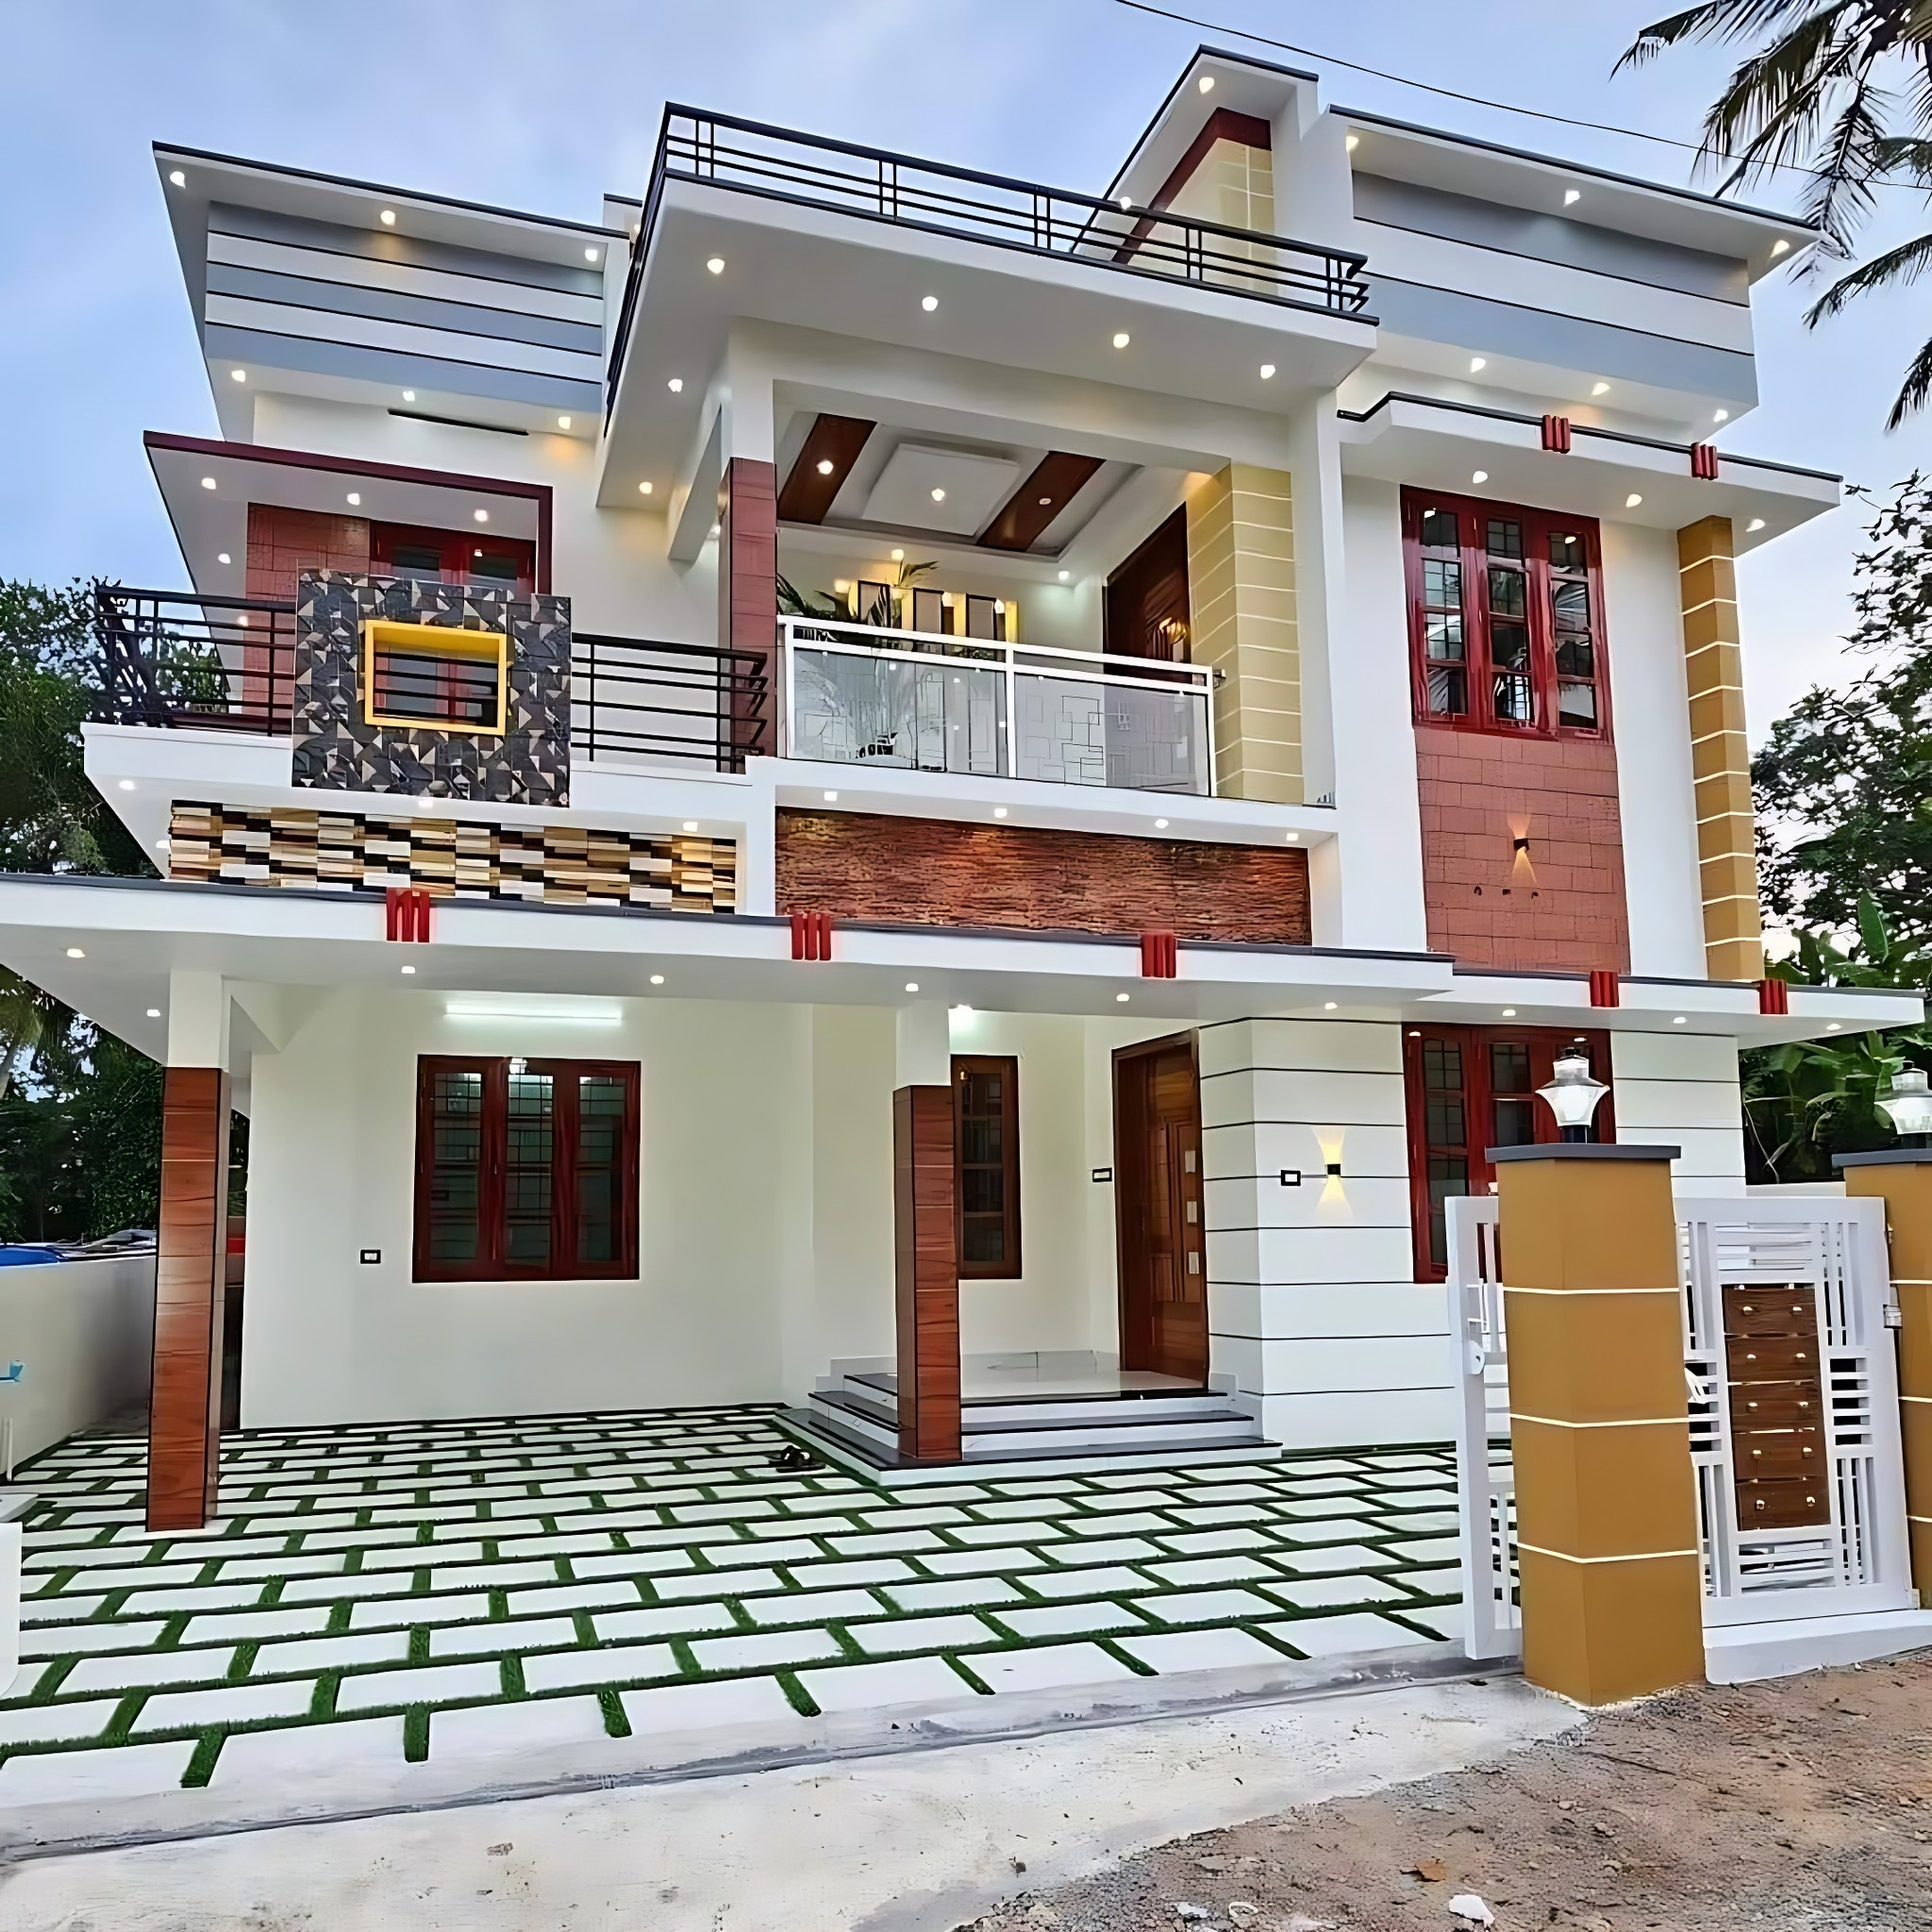

## What we're going to cover


Specifically, we're going to go through doing the following with TensorFlow:

* Architecture of a regression model
* Input shapes and output shapes
  * `X`: features/data (inputs)
  * `y`: labels (outputs)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
    * Defining a loss function
    * Setting up an optimizer
    * Creating evaluation metrics
  * Fitting a model (getting it to find patterns in our data)
* Evaluating a model
  * Visualizng the model ("visualize, visualize, visualize")
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it later)
* Loading a model


## Typical architecture of a regresison neural network

The word typical is on purpose.

**Why?**

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

* Input layer shape : Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)

* Hidden layer(s): Problem specific, minimum = 1, maximum = unlimited

* Neurons per hidden layer:	Problem specific, generally 10 to 100

* Output layer shape:	Same shape as desired prediction shape (e.g. 1 for house price)


* Hidden activation:	Usually [ReLU](https://www.kaggle.com/code/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit)

* Output activation:	None, ReLU, logistic/tanh

* Loss function:	MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers

* Optimizer:	[SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [6]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end) : {datetime.datetime.now()}")

2.15.0
Notebook last run (end-to-end) : 2024-04-01 07:59:17.396279


## Creating data to view and fit
Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.


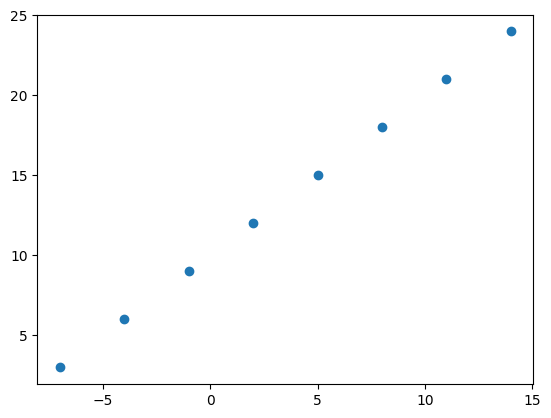

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Regression input shapes and output shapes
One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [8]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional_api) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.


In [10]:
# Set random seeds
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 501ms/step - loss: 19.9006 - mae: 19.9006
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 19.6194 - mae: 19.6194
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 19.3381 - mae: 19.3381
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 19.0569 - mae: 19.0569
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 18.7756 - mae: 18.7756


In [11]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 178ms/step


array([[-18.65443]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).


<img src="https://camo.githubusercontent.com/e594cf64644659fd8039e3d5ba7d71031c4cf3d5f61491fa7237db83873b9606/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f30322d696d70726f76696e672d612d6d6f64656c2d66726f6d2d6d6f64656c2d70657273706563746976652e706e67" alt="MarineGEO circle logo" style="height: 100%; width:100%;"/>


*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 449ms/step - loss: 14.4661 - mae: 14.4661
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 14.3336 - mae: 14.3336
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 14.2011 - mae: 14.2011
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 14.0686 - mae: 14.0686
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 13.9361 - mae: 13.9361
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 13.8036 - mae: 13.8036
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 13.6711 - mae: 13.6711
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 13.5386 - mae: 13.5386
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 13.4061 - mae: 13.4061
Epoch 10/100
1/1 [==============================] - 0s 27ms/step - loss: 13.2736 - mae: 13.2736
Epoch 11/100
1/1 [==============================

In [13]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 495ms/step


array([[29.5176]], dtype=float32)

Much better!

We got closer this time. But we could still be better.

Now we've trained a model, how could we evaluate it?

## Evaluating a model
A typical workflow you'll go through when building neural networks is:

> Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.



## Visualize, visualize, visualize
